The graph similarity code elaborates on a set of techniques and methods that can be used to verify whether two sets of data points completely superimpose each other with a certain degree of confidence that can be set by the user. This code uses a synthetic dataset to show the working.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Creating a dataset using the uniform distribution and adding noise to the first dataset to create the second. The rest of the code can be used when the data points are given as tuples.

In [ ]:
size = 100
epsilon = size/100
x1 = size*stats.uniform.rvs(size = size)
x2 = x1 + (size/100)*stats.uniform.rvs(size = size)
y1 = size*stats.uniform.rvs(size = size)
y2 = y1 + (size/100)*stats.uniform.rvs(size = size)

Creating tuples from the x and y values for the two sets.

In [ ]:
set1 = list()
set2 = list()
for (x, y) in zip(x1, y1):
  set1.append((x,y))
for (x, y) in zip(x2, y2):
  set2.append((x,y))

Sorting the two sets by x to find the corresponding closest points. 

In [ ]:
set1.sort()

In [ ]:
set2.sort()

Plotting the points

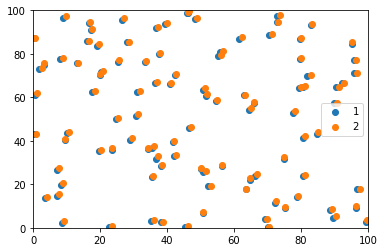

In [ ]:
plt.scatter(*zip(*set1))
plt.scatter(*zip(*set2))
plt.xlim([0,size])
plt.ylim([0,size])
plt.legend(['1', '2'])

We calculate certain parameters and check it with a given threshold. If it is lesser then we conclude that the points are highly similar. We can choose any of the below methods and a threshold value to suit our purpose.

1. Calculate distance between closest points and use the mean or median as a measure. Median is a more robust form.

In [ ]:
x1 = np.array(list(zip(*set1))[0])
x2 = np.array(list(zip(*set2))[0])
y1 = np.array(list(zip(*set1))[1])
y2 = np.array(list(zip(*set2))[1])

In [ ]:
def dist(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [ ]:
d = dist(x1,y1,x2,y2)

In [ ]:
np.mean(d)

8.826252217141189

In [ ]:
np.mean(d) < epsilon

False

In [ ]:
np.median(d)

0.881657580561967

In [ ]:
np.median(d) < epsilon

True

2. Calculate correlation between the points and check if they are similar for the two datasets.

In [ ]:
np.corrcoef(x1, y1)

array([[ 1.        , -0.11263258],
       [-0.11263258,  1.        ]])

In [ ]:
np.corrcoef(x2, y2)

array([[ 1.        , -0.11288613],
       [-0.11288613,  1.        ]])

In [ ]:
abs(np.corrcoef(x1, y1)[0][1] - np.corrcoef(x2, y2)[0][1])

0.0002535533323608785

In [ ]:
abs(np.corrcoef(x1, y1)[0][1] - np.corrcoef(x2, y2)[0][1]) < epsilon

True

3. Absolute difference of y values

In [ ]:
np.mean(abs(y1 - y2))

8.631576470035995

In [ ]:
np.mean(abs(y1 - y2)) < epsilon

False

In [ ]:
np.median(abs(y1 - y2))

0.6351752596055587

In [ ]:
np.median(abs(y1 - y2)) < epsilon

True

4. Squared y values

In [ ]:
np.mean(abs((y1 - y2)**2))

359.15317432417595

In [ ]:
np.mean(abs((y1 - y2)**2)) < epsilon

False

In [ ]:
np.median(abs((y1 - y2)**2))

0.40376486833083797

In [ ]:
np.median(abs((y1 - y2)**2)) < epsilon

True

We can see that mean clearly fails in most cases. This is due to the presence of outliers. Thus, median is a better measure.

5. Kolmogorov–Smirnov test 
It compares the two sample distributions to calculate the probability with which both the datasets belong to the same unknown distribution.



In [ ]:
stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.03, pvalue=0.9999999999962054)

In [ ]:
stats.ks_2samp(y1, y2)

Ks_2sampResult(statistic=0.03, pvalue=0.9999999999962054)

High p value implies that the points are highly likely to belong to the same distribution.